# Day 08. Exercise 05
# Clustering

## 0. Imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

1. Считайте файл [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) в dataframe.
2. Удалите `pageviews`, мы будем кластеризовать пользователей только по количеству коммитов и их средней разнице.

In [22]:
df = pd.read_csv('../data/regression.csv')

In [23]:
# Remove duplicates
df = df.drop(columns = ["pageviews"])
X = df[['num_commits', 'AVG(diff)']]
print(df.columns.tolist())
df.rename(columns={
        "avg(diff)": "avg_diff"
    })

['uid', 'num_commits', 'AVG(diff)']


,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          29 non-null     object 
 1   num_commits  29 non-null     int64  
 2   AVG(diff)    29 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 824.0+ bytes


In [25]:
# Prepare features
X = df[['num_commits', 'AVG(diff)']]

## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

1. Проверьте документацию о том, как работает этот алгоритм.
2. Используйте этот алгоритм для создания кластеров, используйте `random_state=21` и `n_clusters=3`.
3. Визуализируйте данные на `диаграмме рассеяния`.
4. Попробуйте разные значения `n_clusters` и посмотрите, как изменится ваш график.
5. Рассчитайте `silhouette_score` (проверьте документацию о метрике).

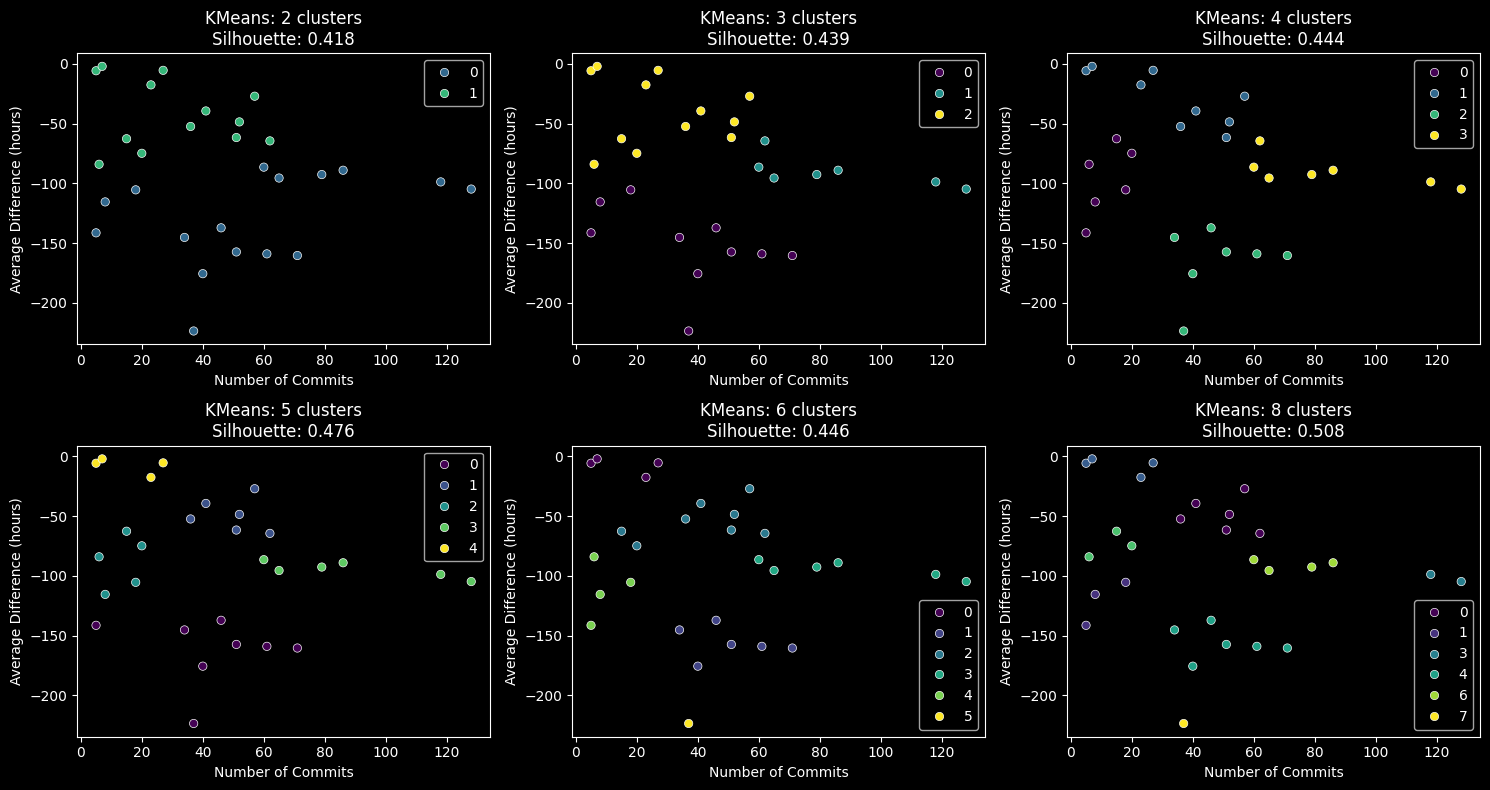

In [26]:
# Try different cluster counts
n_clusters_list = [2, 3, 4, 5, 6, 8]
kmeans_results = []
plt.figure(figsize=(15, 8))
for i, n_clusters in enumerate(n_clusters_list):
    # Train model
    kmeans = KMeans(n_clusters=n_clusters, random_state=21, n_init=10)
    clusters = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    sil_score = silhouette_score(X, clusters)
    kmeans_results.append((n_clusters, sil_score))
    
    # Plot
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=X, x='num_commits', y='AVG(diff)', hue=clusters, palette='viridis')
    plt.title(f'KMeans: {n_clusters} clusters\nSilhouette: {sil_score:.3f}')
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference (hours)')

plt.tight_layout()
plt.style.use("dark_background")
plt.show()

In [27]:
# Print silhouette scores
print("KMeans Silhouette Scores:")
for n, score in kmeans_results:
    print(f"Clusters: {n}, Score: {score:.4f}")

KMeans Silhouette Scores:
Clusters: 2, Score: 0.4179
Clusters: 3, Score: 0.4390
Clusters: 4, Score: 0.4441
Clusters: 5, Score: 0.4761
Clusters: 6, Score: 0.4457
Clusters: 8, Score: 0.5078


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

1. Проверьте документацию о том, как работает этот алгоритм.
2. Используйте этот алгоритм для создания кластеров с `eps=20` и `min_samples=2`.
3. Визуализируйте данные на `диаграмме рассеяния`.
4. Попробуйте разные значения `eps` и `min_samples` и посмотрите, как изменится ваш график.
5. Рассчитайте `silhouette_score` (проверьте документацию о метрике).

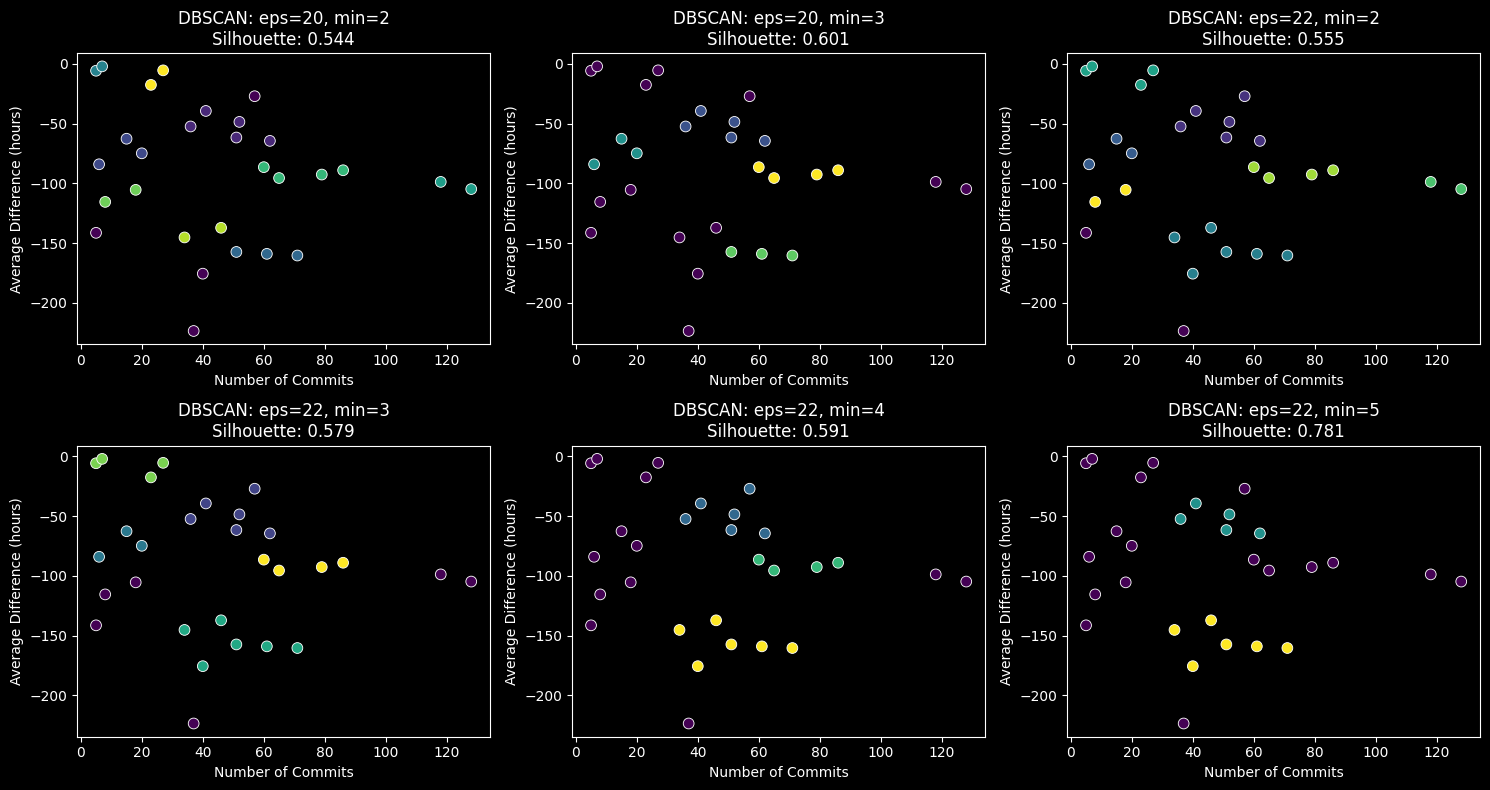

In [28]:
# Try different parameters
feature_cols = ['num_commits', 'AVG(diff)']   
X   = df[feature_cols].values                
df_ = df[feature_cols].copy()             
results = []
dbscan_params = [
    {'eps': 20, 'min_samples': 2},
    {'eps': 20, 'min_samples': 3},
    {'eps': 22, 'min_samples': 2},
    {'eps': 22, 'min_samples': 3},
    {'eps': 22, 'min_samples': 4},
    {'eps': 22, 'min_samples': 5},
]

plt.figure(figsize=(15, 8))
for i, params in enumerate(dbscan_params):
    # Train model
    dbscan   = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    clusters = dbscan.fit_predict(X)

    # silhouette
    core = clusters != -1
    if core.sum() >= 2 and len(set(clusters[core])) > 1:
        sil_score = silhouette_score(X[core], clusters[core])
    else:
        sil_score = np.nan

    # Plot
    plt.subplot(2, 3, i + 1)

    sns.scatterplot(
        data=df_,                     
        x='num_commits', y='AVG(diff)',
        hue=clusters, palette='viridis',
        legend=False, s=60
    )

    plt.title(f"DBSCAN: eps={params['eps']}, min={params['min_samples']}\n"
              f"Silhouette: {sil_score:.3f}")
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference (hours)')

    results.append((params['eps'], params['min_samples'], sil_score, clusters))
plt.tight_layout()
plt.show()
df_res = pd.DataFrame(results, columns=['eps', 'min_samples', 'sil', 'labels'])

In [29]:
clusters

array([ 0, -1,  1,  0, -1, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  0,  1,
       -1, -1, -1, -1,  0, -1,  1, -1,  1, -1, -1,  1])

In [30]:
df_res

,eps,min_samples,sil,labels
0,20,2,0.544186,"[0, 1, 2, 0, 3, 4, 5, 5, 5, 6, 7, 3, 5, 0, 8, ..."
1,20,3,0.601085,"[0, 1, 2, 0, -1, -1, 3, 3, 3, -1, -1, -1, 3, 0..."
2,22,2,0.554686,"[0, 1, 2, 0, 3, 4, 5, 5, 5, 6, 2, 3, 5, 0, 3, ..."
3,22,3,0.579392,"[0, 1, 2, 0, 3, -1, 4, 4, 4, -1, 2, 3, 4, 0, 3..."
4,22,4,0.591433,"[0, -1, 2, 0, -1, -1, 1, 1, 1, -1, 2, -1, 1, 0..."
5,22,5,0.780591,"[0, -1, 1, 0, -1, -1, -1, -1, -1, -1, 1, -1, -..."


In [31]:
best_row = df_res.loc[df_res['sil'].idxmax()]
best_eps, best_m, best_sil = best_row[['eps', 'min_samples', 'sil']]
print(f"best_eps = {best_eps}, best_min_samples = {best_m}, silhouette = {best_sil:.3f}")

best_eps = 22, best_min_samples = 5, silhouette = 0.781


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

1. Используйте этот алгоритм для создания кластеров с `n_clusters=5`.
2. Визуализируйте данные на `диаграмме рассеяния`.
3. Попробуйте разные значения `n_clusters` и посмотрите, как изменится ваш график.
4. Рассчитайте `silhouette_score`.
5. Визуализируйте `дендрограмму`.

In [32]:
print(df_.columns)

Index(['num_commits', 'AVG(diff)'], dtype='object')


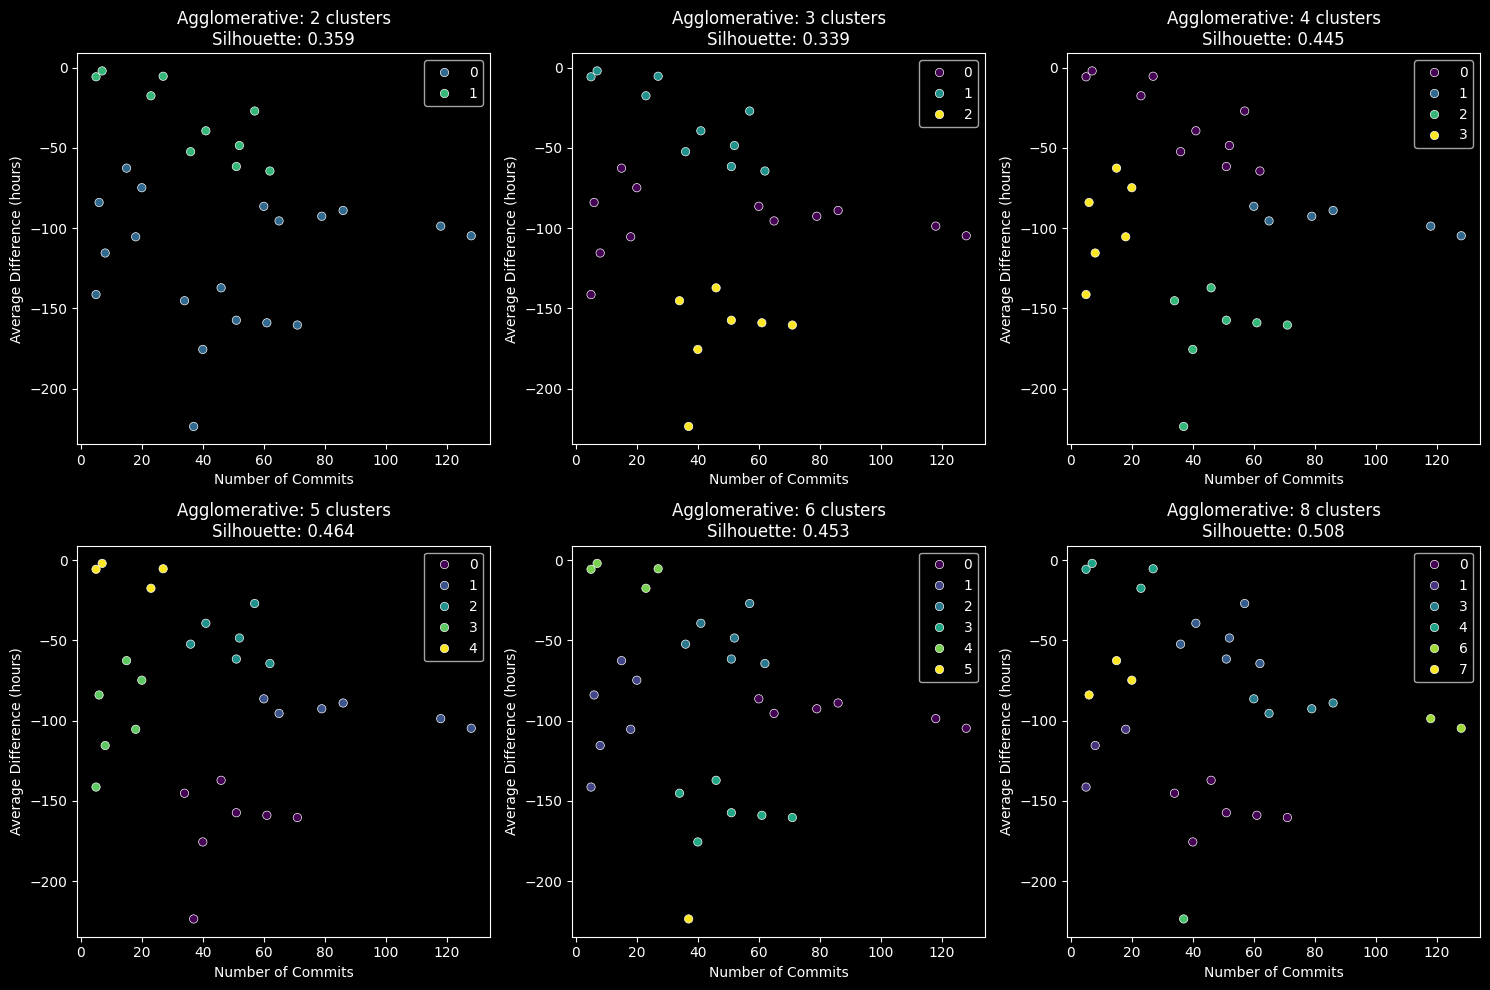

In [33]:
n_clusters_list = [2, 3, 4, 5, 6, 8]
agg_results = []

plt.figure(figsize=(15, 10))
for i, n_clusters in enumerate(n_clusters_list):
    # Train model
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = agg.fit_predict(X)

    # Calculate silhouette score
    sil_score = silhouette_score(X, clusters)
    agg_results.append((n_clusters, sil_score, clusters))

    # Plot
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df_, x='num_commits', y='AVG(diff)', hue=clusters, palette='viridis')
    plt.title(f'Agglomerative: {n_clusters} clusters\nSilhouette: {sil_score:.3f}')
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference (hours)')

plt.tight_layout()
plt.style.use("dark_background")
plt.show()

In [34]:
best_k, best_sil, best_lbl = max(agg_results, key=lambda t: t[1])
print(f"✔ best Agglomerative clusters = {best_k}, silhouette = {best_sil:.3f}")

✔ best Agglomerative clusters = 8, silhouette = 0.508


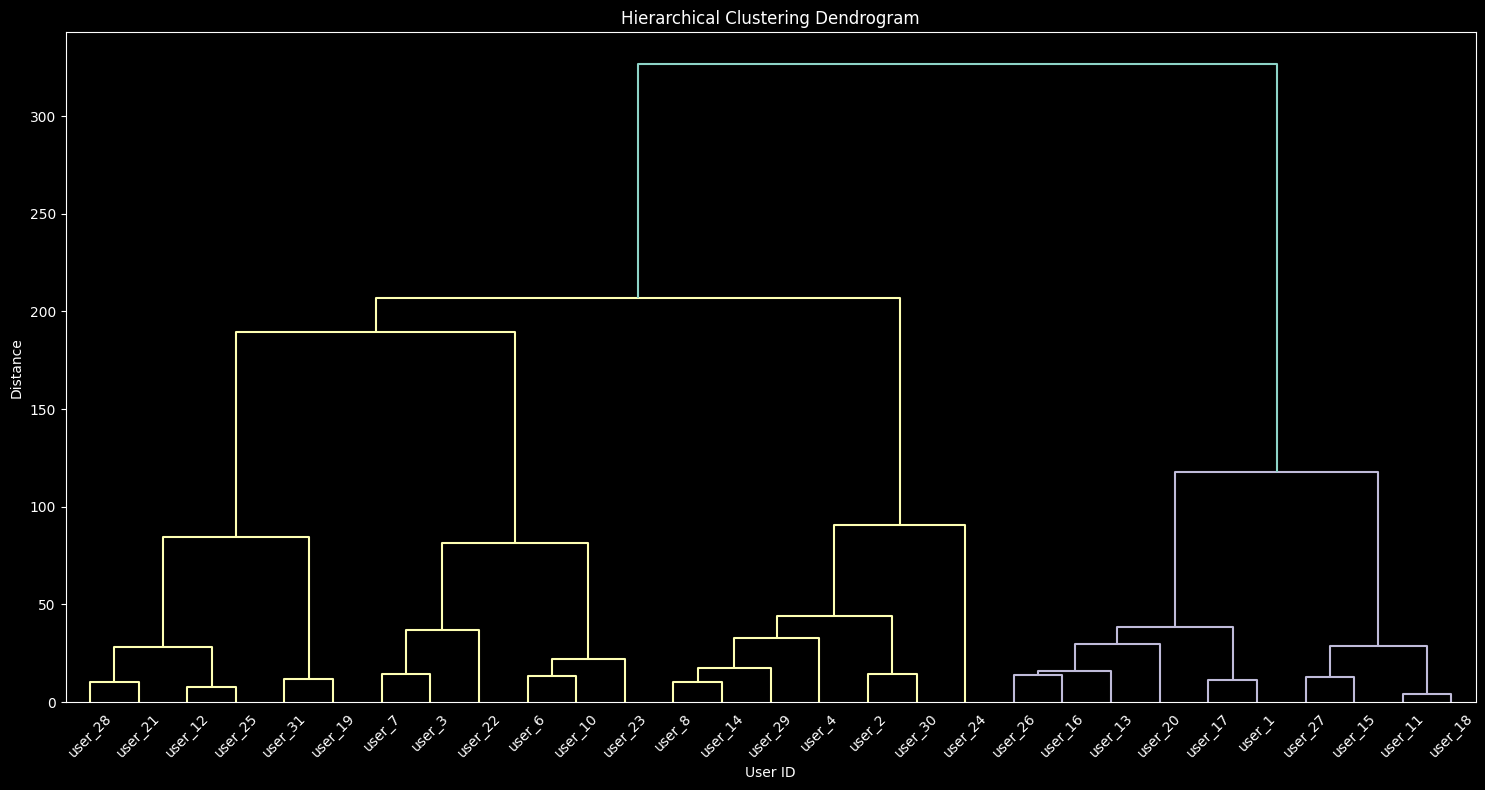

In [35]:

# Dendrogram visualization
plt.figure(figsize=(15, 8))
linked = linkage(X, method='ward')
dendrogram(linked, orientation='top', labels=df['uid'].values, distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('User ID')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

Напишите функцию, которая:
1. Принимает в качестве аргументов: класс модели кластеризации, ее параметры, имя параметра для оптимизации, диапазон значений параметра для проверки.
2. Пробует различные значения из заданного диапазона параметров и вычисляет `silhouette_score` для каждого значения из диапазона.
3. Находит лучшее значение параметра в диапазоне.
4. Возвращает два подграфика:

- - первый показывает, как `silhouette_score` изменяется в зависимости от значения параметра,
- - второй визуализирует данные на `диаграмме рассеяния`, используя модель кластеризации с лучшим значением параметра.

In [36]:
def optimize_clustering(model_class, param_name, param_range, X, **model_kwargs):
    """Optimize clustering parameter and visualize results"""
    scores = []
    best_score = -1
    best_param = None
    best_clusters = None
    
    # Try different parameter values
    for param in param_range:
        params = {param_name: param}
        model = model_class(**params, **model_kwargs)
        # Special handling for DBSCAN noise
        if model_class == DBSCAN:
            clusters = model.fit_predict(X)
            unique_clusters = set(clusters)
            if len(unique_clusters) > 1 and -1 not in unique_clusters:
                score = silhouette_score(X, clusters)
            elif len(unique_clusters) > 2:  # Includes noise
                mask = clusters != -1
                if len(set(clusters[mask])) > 1:
                    score = silhouette_score(X[mask], clusters[mask])
                else:
                    score = -1
            else:
                score = -1
        else:
            clusters = model.fit_predict(X)
            if len(set(clusters)) > 1:
                score = silhouette_score(X, clusters)
            else:
                score = -1
        scores.append(score)
        
        # Track best parameters
        if score > best_score:
            best_score = score
            best_param = param
            best_clusters = clusters
    
    # Create plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Parameter vs Score plot
    ax1.plot(param_range, scores, 'bo-')
    ax1.set_xlabel(param_name)
    ax1.set_ylabel('Silhouette Score')
    ax1.set_title('Parameter Optimization')
    ax1.axvline(x=best_param, color='r', linestyle='--')
    
    # Best clustering visualization
    ax2.scatter(X[:, 0], X[:, 1], c=best_clusters, cmap='viridis')
    ax2.set_xlabel('num_commits')
    ax2.set_ylabel('avg_diff')
    ax2.set_title(f'Best Clustering ({param_name}={best_param})\nSilhouette: {best_score:.3f}')
  
    plt.tight_layout()
    plt.show()

    return best_param, best_score

Optimizing KMeans n_clusters:


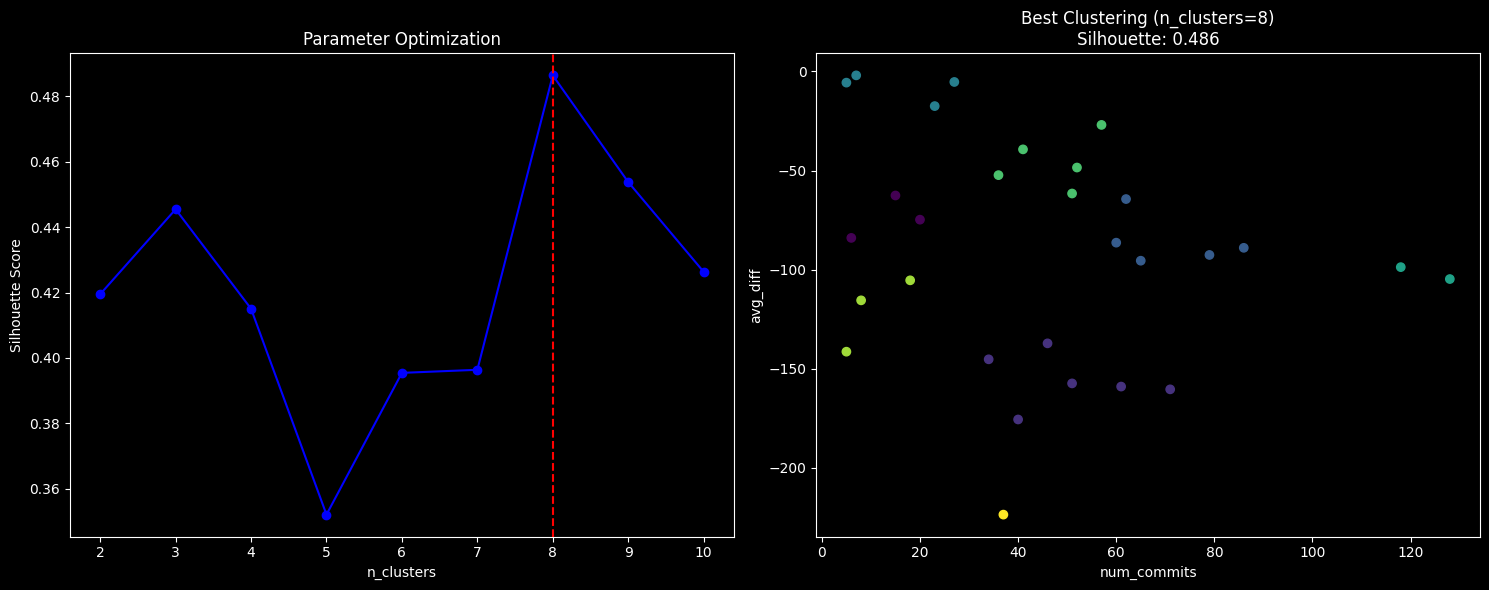

Best n_clusters: 8, Score: 0.4864


In [37]:
# Optimize KMeans n_clusters
print("Optimizing KMeans n_clusters:")
best_n_clusters, best_score = optimize_clustering(
    model_class=KMeans,
    param_name='n_clusters',
    param_range=range(2, 11),
    X=X,
    random_state=21
)
print(f"Best n_clusters: {best_n_clusters}, Score: {best_score:.4f}")


Optimizing DBSCAN eps:


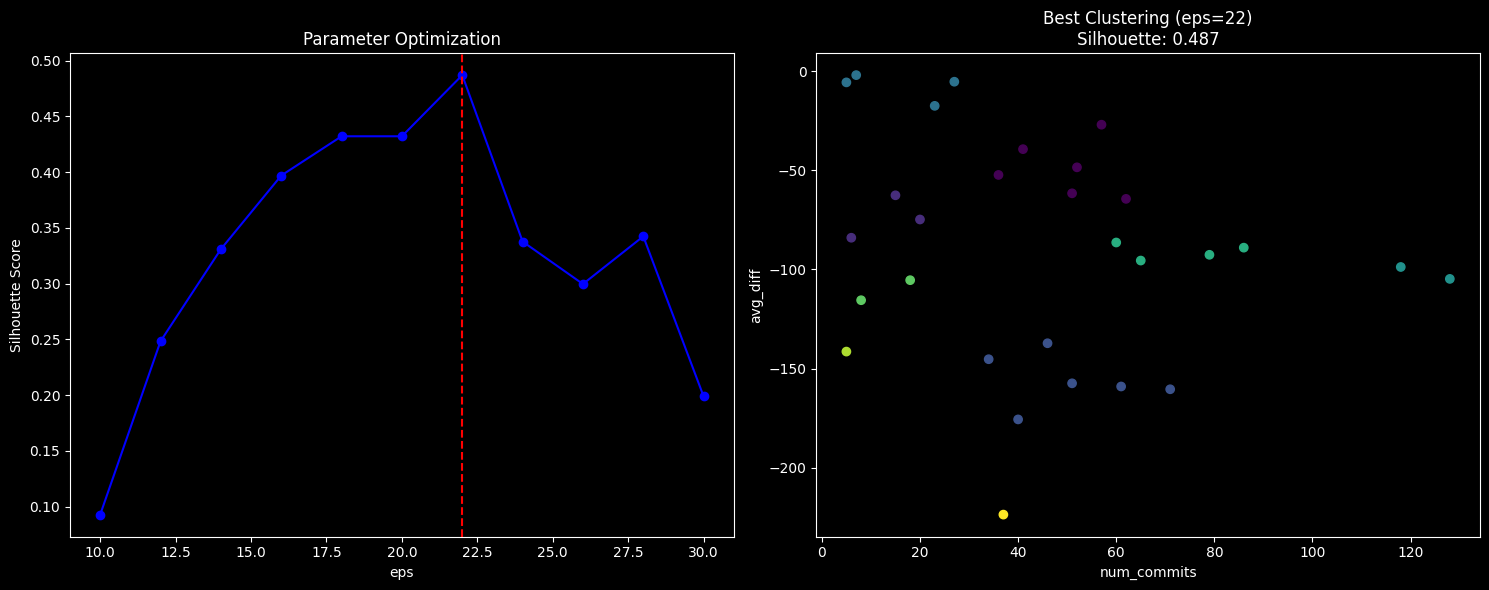

Best eps: 22, Score: 0.4871


In [38]:
# Optimize DBSCAN eps
print("\nOptimizing DBSCAN eps:")
best_eps, best_score = optimize_clustering(
    model_class=DBSCAN,
    param_name='eps',
    param_range=np.arange(10, 31, 2),
    X = X,
    min_samples=1
)
print(f"Best eps: {best_eps}, Score: {best_score:.4f}")


Optimizing DBSCAN min_samples:


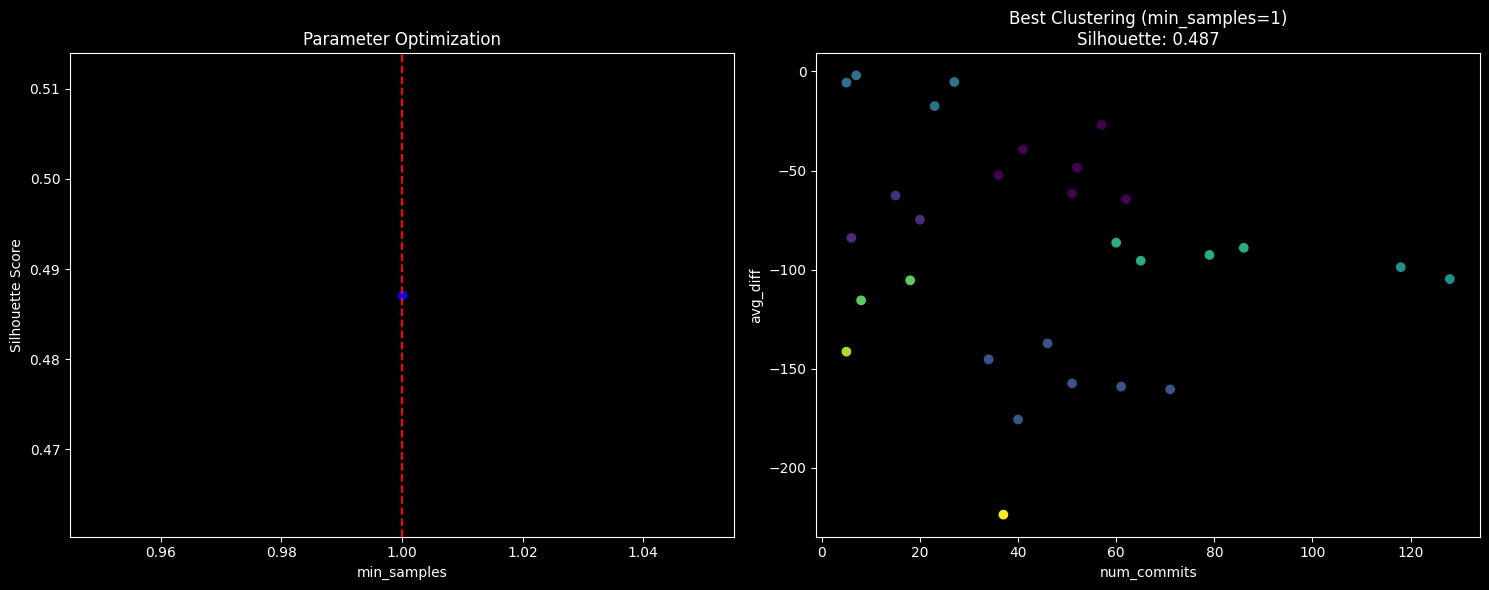

Best min_samples: 1, Score: 0.4871


In [39]:
# Optimize DBSCAN min_samples
print("\nOptimizing DBSCAN min_samples:")
best_min_samples, best_score = optimize_clustering(
    model_class=DBSCAN,
    param_name='min_samples',
    param_range=np.arange(1, 2),
    X=X,
    eps=best_eps 
)
print(f"Best min_samples: {best_min_samples}, Score: {best_score:.4f}")


Optimizing AgglomerativeClustering n_clusters:


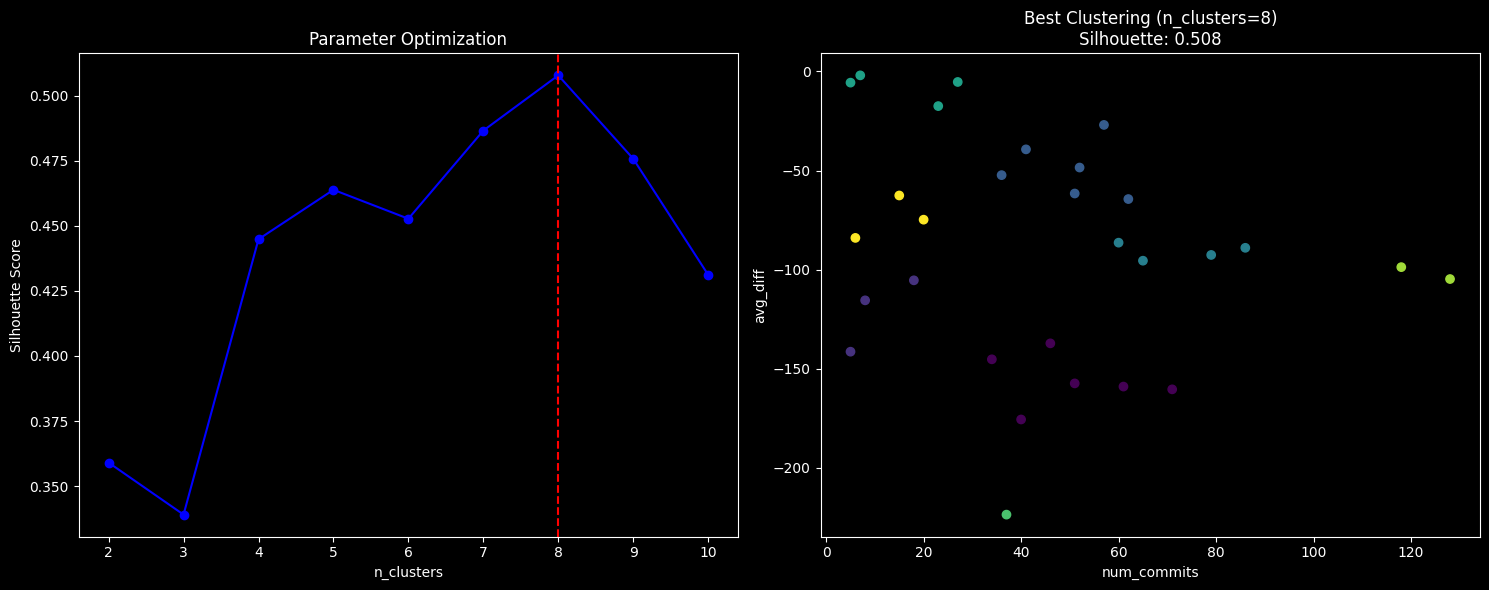

Best n_clusters: 8, Score: 0.5078


In [40]:
# Optimize AgglomerativeClustering n_clusters
print("\nOptimizing AgglomerativeClustering n_clusters:")
best_n_clusters_agg, best_score = optimize_clustering(
    model_class=AgglomerativeClustering,
    param_name='n_clusters',
    param_range=np.arange(2, 11),
    X=X,
    linkage='ward' 
)
print(f"Best n_clusters: {best_n_clusters_agg}, Score: {best_score:.4f}")